In [31]:
import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Load dataset

In [32]:
#span massage dataset
df1=pd.read_csv("/content/drive/MyDrive/Work_space/Data set/Cyber/function3/spam.csv", encoding='ISO-8859-1')
df1.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df1=df1.reindex(columns=["v2","v1"])
df1=df1.rename(columns={"v2":"text","v1":"label"})
# Map categories
df1['label'] = df1['label'].map({'ham':1, 'spam':0})
print(df1["label"].value_counts())
df1.head()

1    4825
0     747
Name: label, dtype: int64


,text,label
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1


In [33]:
#Load url dataset
df2=pd.read_csv("/content/drive/MyDrive/Work_space/Data set/Cyber/function3/data_url.csv")
df2=df2.rename(columns={"url":"text","label":"label"})
df2['label'] = df2['label'].map({'good':1, 'bad':0})
print(df2["label"].value_counts())
df2.tail(10)

1    344821
0     75643
Name: label, dtype: int64


,text,label
420454,defibel.org/wp-includes/images/index.html,0
420455,shapingsoftware.com/2009/02/09/architectural-s...,0
420456,free.ulohapp.info/?br_fl=2872&amp;tuif=5539&am...,0
420457,free.ulohapp.info/?oq=CEh3h_PskJLFZaQWwjEKBegU...,0
420458,mol.com-ho.me/cv_itworx.doc,0
420459,23.227.196.215/,0
420460,apple-checker.org/,0
420461,apple-iclods.org/,0
420462,apple-uptoday.org/,0
420463,apple-search.info,0


In [34]:
#load twitter dataset
df3=pd.read_csv("/content/drive/MyDrive/Work_space/Data set/Cyber/function3/Twitter_Data.csv")
df3=df3.rename(columns={"clean_text":"text","category":"label"})
# Group by 'label' column
grouped = df3.groupby("label")
df3=grouped.filter(lambda x: x['label'].isin([-1, 1]).any())
print(df3["label"].value_counts())
df3['label'] = df3['label'].map({1:1, -1:0})
print(df3["label"].value_counts())
df3.head(10)

 1.0    72250
-1.0    35510
Name: label, dtype: int64
1    72250
0    35510
Name: label, dtype: int64


,text,label
0,when modi promised “minimum government maximum...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
8,with upcoming election india saga going import...,1
9,gandhi was gay does modi,1
10,things like demonetisation gst goods and servi...,1
11,hope tuthukudi people would prefer honest well...,1
12,calm waters wheres the modi wave,1
15,vote such party and leadershipwho can take fas...,0


In [35]:
# Load finalSentimentdata2 dataset
df4 = pd.read_csv('/content/drive/MyDrive/Work_space/Data set/Healing Minds/fun4/Healing Mind function 4 d2/finalSentimentdata2.csv')
df4= df4.drop(['Unnamed: 0'], axis=1)
df4= df4.rename(columns={'text': 'text', 'sentiment':'label'})
df4=df4.reindex(columns=["text","label"])
df4['label'] = df4['label'].map({'sad': 0, 'anger': 0, 'fear': 0, 'joy':1})
print(df4["label"].value_counts())
# Output first five rows
df4.head()

0    2363
1     727
Name: label, dtype: int64


,text,label
0,agree the poor in india are treated badly thei...,0
1,if only i could have spent the with this cutie...,1
2,will nature conservation remain a priority in ...,1
3,coronavirus disappearing in italy show this to...,0
4,uk records lowest daily virus death toll since...,0


In [36]:
#CONCAT THE DATASETS
df=pd.concat([df1,df2,df4],ignore_index=True)
df.isnull().sum()
df.dropna(axis=0, inplace=True)
print(df.shape)
print(df["label"].value_counts())
df.head()

(429126, 2)
1    350373
0     78753
Name: label, dtype: int64


,text,label
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1


##Data visualisation

<Axes: xlabel='label'>

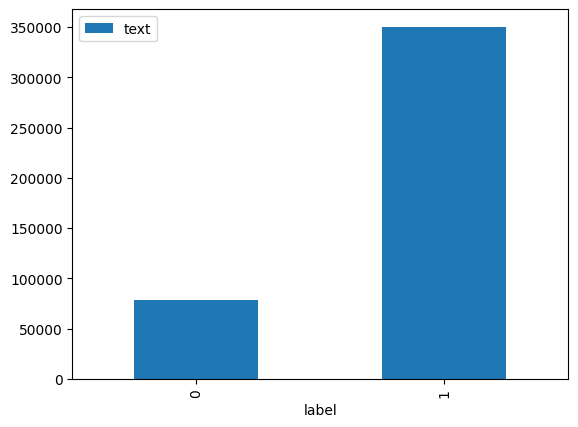

In [7]:
# The distribution of sentiments
df.groupby('label').count().plot(kind='bar')

<Axes: >

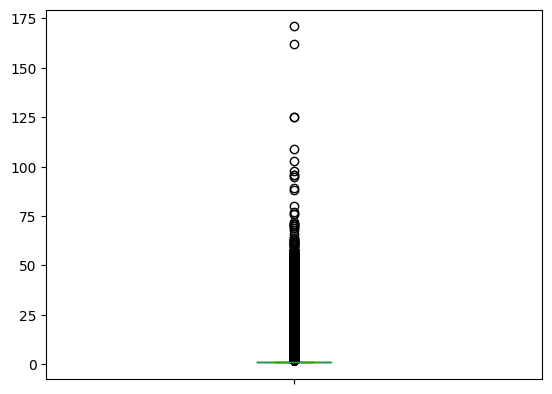

In [8]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

In [9]:
import plotly.express as px
fig = px.pie(df, names='label', title ='Pie chart of label')
fig.show()

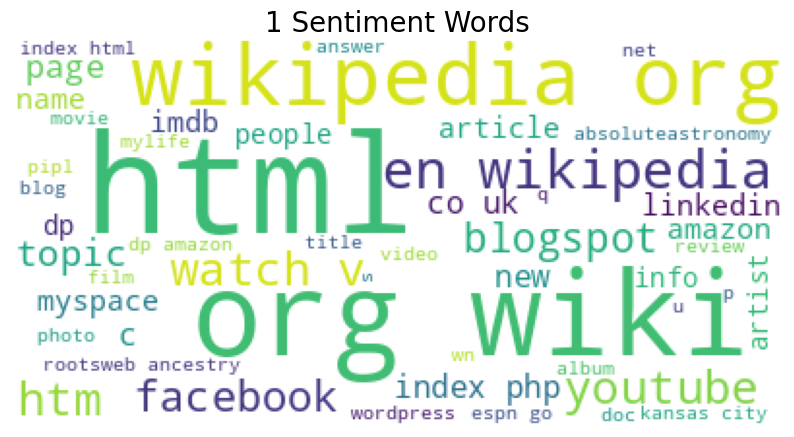

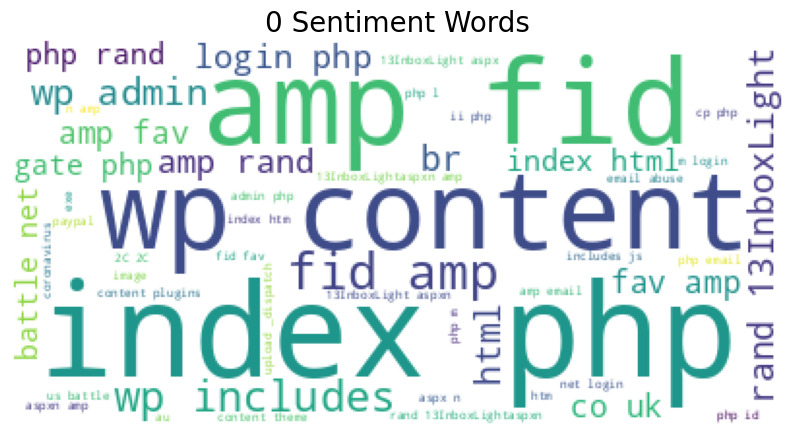

In [10]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(data, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([df for df in df[df.label==category]['text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive words
wordcount_gen(df, 1)

# Negative words
wordcount_gen(df, 0)



##Data preprocces

In [37]:
def pre_text(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][12])
print("\nProcessed tweet ->", pre_text(df['text'][12]))


Original tweet -> URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

Processed tweet -> ['urgent!', '1', 'week', 'free', 'membership', 'å£100,000', 'prize', 'jackpot!', 'txt', 'word:', 'claim', 'no:', '81010', 't&c', 'www.dbuk.net', 'lccltd', 'pobox', '4403ldnw1a7rw18']


In [38]:
# Apply data processing to each tweet
X = list(map(pre_text, df['text']))

In [41]:
print(X[12])

['urgent!', '1', 'week', 'free', 'membership', 'å£100,000', 'prize', 'jackpot!', 'txt', 'word:', 'claim', 'no:', '81010', 't&c', 'www.dbuk.net', 'lccltd', 'pobox', '4403ldnw1a7rw18']


In [42]:
y = pd.get_dummies(df['label'])
print(y)

        0  1
0       0  1
1       0  1
2       1  0
3       0  1
4       0  1
...    .. ..
429121  1  0
429122  1  0
429123  0  1
429124  1  0
429125  1  0

[429126 rows x 2 columns]


In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][12])
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[12])

Before Tokenization & Padding 
 URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
After Tokenization & Padding 
 [3723   73  273 2312   26   14  773  247   17  444 2682 2063  319   10
 2275 2147   22  202   77   34   69    9    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [81]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 390272 unique tokens.


split trainingand testing data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(257475, 100)
(257475, 2)
(85826, 100)
(85826, 2)


In [46]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_PDF.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_PDF.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

Training model

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
vocab_size = 5000
embedding_size = 64
epochs=15
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = legacy_optimizers.SGD(lr=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           320000    
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 32)           6176      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 50, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [50]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'PDF_CLASSIFICATION.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [52]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])


In [53]:
# Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])

Epoch 1/15
4023/4024 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9321 - precision_4: 0.9321 - recall_4: 0.9321
Epoch 1: val_loss improved from inf to 0.13076, saving model to PDF_CLASSIFICATION.keras
4024/4024 [==============================] - 137s 33ms/step - loss: 0.1792 - accuracy: 0.9321 - precision_4: 0.9321 - recall_4: 0.9321 - val_loss: 0.1308 - val_accuracy: 0.9513 - val_precision_4: 0.9513 - val_recall_4: 0.9513
Epoch 2/15
4023/4024 [============================>.] - ETA: 0s - loss: 0.1199 - accuracy: 0.9548 - precision_4: 0.9548 - recall_4: 0.9548
Epoch 2: val_loss improved from 0.13076 to 0.11503, saving model to PDF_CLASSIFICATION.keras
4024/4024 [==============================] - 142s 35ms/step - loss: 0.1199 - accuracy: 0.9548 - precision_4: 0.9548 - recall_4: 0.9548 - val_loss: 0.1150 - val_accuracy: 0.9562 - val_precision_4: 0.9562 - val_recall_4: 0.9562
Epoch 3/15
4023/4024 [============================>.] - ETA: 0s - loss: 0.1097 - accurac

In [54]:
from keras.models import load_model
#Load model
model = load_model(r'/content/PDF_CLASSIFICATION.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9578
Precision : 0.9578
Recall    : 0.9578


2683/2683 [==============================] - 19s 7ms/step


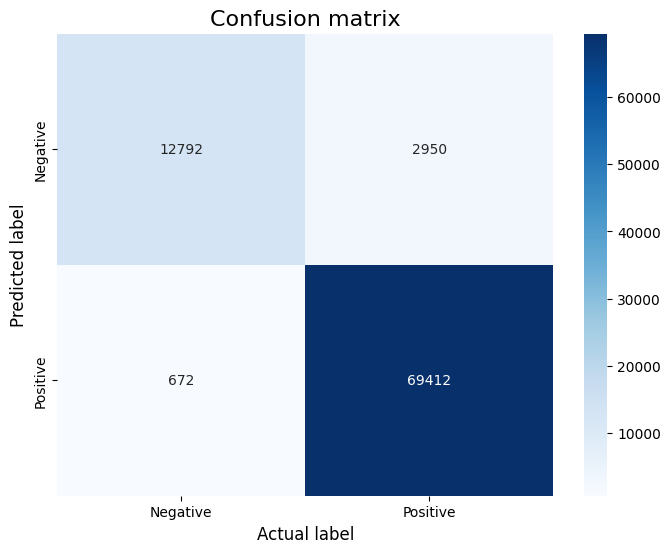

In [55]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [56]:
from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Positive']
    max_len=100

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [78]:
df4.loc[1,:]

text     if only i could have spent the with this cutie...
label                                                    1
Name: 1, dtype: object

In [79]:
predict_class([df4.loc[1,"text"]])

1/1 [==============================] - 0s 16ms/step
The predicted sentiment is Positive


In [80]:
predict_class(["🎉🎉🎉 Exciting News Alert! 🎉🎉🎉Congratulations! You've been selected as one of our lucky winners! 🌟🎁🌟 You've won a fabulous prize worth thousands! 💰💰💰But hurry, time is running out! ⏳⏰ Claim your prize now by clicking the link below! 🖱️👇Don't miss out on this incredible opportunity! Act fast and claim your reward today! 🏆✨Click here to claim your prize: [LINK]Remember, this is a limited time offer, so don't delay! 🚀🎊🚀Thank you for being a valued member of our community! 🙏🤗🎉"])

1/1 [==============================] - 0s 17ms/step
The predicted sentiment is Negative
